In [1]:
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import pandas as pd 
import scipy.stats
%matplotlib inline
%run clean.py

%run methods.ipynb
###Collect the  data of the sessions to plot
sns.set_style("darkgrid")



#############
study_sessions = ["7_6_2021","24_6_2021","16_6_2021","17_6_2021","23_6_2021","21_6_2021","22_6_2021"]
#############
#study_sessions = ["17_6_2021","23_6_2021","21_6_2021","22_6_2021"]
#for N = 20
#study_sessions = ["7_6_2021","24_6_2021","16_6_2021"]
#for N = 10
join_name = 'basura'
 
#############

dataframes_saved = [0 for i in range(len(study_sessions))]
#os.chdir(start_point)
start_point = os.getcwd()
#os.mkdir(os.path.join(start_point,join_name))
for i,session in enumerate(study_sessions):
    os.chdir(os.path.join(start_point,session))
    df_1 = pd.read_excel('ethnic_markers_acabado.xlsx')
    df_2 = pd.read_excel('norm_compliance_acabado.xlsx')
    participants = pd.read_excel('participants.xlsx')
    rounds_1 = int(max(df_1['subsession.round_number'].unique()))
    rounds_2 = int(max(df_2['subsession.round_number'].unique()))
    num_participants = int(max(df_1['participant.id_in_session'].unique()))
    ### Then, clean the data, separately 
    players_info = dar_xeito(df_1,df_2,participants,rounds_1,rounds_2,num_participants)
    crear_txt(players_info,session)
    players_info = update_players_info(players_info,df_1,participants)
    ###Then accumulate the data 
    dataframes_saved[i] = players_info
###Then, make the appropiate plots
###For that, create directory

#Stack the auxiliary session
init_session = dataframes_saved[0]
aux_part = [init_session[i] for i in range(len(init_session)) if init_session[i][0]['id_in_subsession'] == 2]
for elem in aux_part:
    elem[0]["id_in_subsession"] = 6
    dataframes_saved[1].append(elem)
dataframes_saved.remove(init_session)
study_sessions.remove(study_sessions[0])
dataframes_saved[1] = dataframes_saved[1][:-3]
dataframes_saved[2] = dataframes_saved[2][:-4]
es = ["N=10; e=1","N=10; e=0.5","N=20; e=1","N=20; e=1","N=20; e=0.5","N=20; e=0.5"]


Inactives:
Dropout:
ID Number                                                   71182648V
ID Type                                                           dni
First name                                                     Sandra
Last name                                              Muñoz San José
Email Address                               100386901@alumnos.uc3m.es
Paypal_database                               sandramunoz97@gmail.com
Player                                                              1
Link                https://cambridge.ibsen-h2020.eu/InitializePar...
Paypal                                                             -1
Bias                                                              0.0
Bias_payoff                                                       0.0
Marker                                                           azul
Comments                                                           -1
id_in_session                                                       1


Inactives:
ID Number                                                  51231389Q
ID type                                                          dni
First name                                                     Delia
Last name                                            Sánchez Delgado
Email address                                  delisd2000@hotmail.es
Paypal_database                                delisd2000@hotmail.es
Player                                                             3
Link               https://cambridge.ibsen-h2020.eu/InitializePar...
Name: 2, dtype: object
***********
87
***********
ID Number                                                  75164228k
ID type                                                          dni
First name                                                     Berta
Last name                                             Rodriguez Lara
Email address                                  bertyrini@hotmail.com
Paypal_database                           

Inactives:
ID Number                                                  50482517R
First name                                                     Jaime
Last name                                                García Moya
Email Address                              100430772@alumnos.uc3m.es
Paypal_database                         garciamoyadanielgm@gmail.com
Player                                                             5
Link               https://cambridge.ibsen-h2020.eu/InitializePar...
Name: 4, dtype: object
***********
83
***********
ID Number                                                  47463772Y
First name                                                Luis Ángel
Last name                                              Lobete Biachó
Email Address                             luislobetebiacho@gmail.com
Paypal_database                           Luislobetebiacho@gmail.com
Player                                                            30
Link               https://cambridge.ibsen

Inactives:
ID Number                                                  08843859z
ID type                                                          dni
First name                                                      JOSE
Last name                                       HERNANDEZ SAN MILLAN
Email address                                    josehsm@hotmail.com
Paypal_database                                  josehsm@hotmail.com
Player                                                             3
Link               https://cambridge.ibsen-h2020.eu/InitializePar...
Name: 2, dtype: object
***********
87
***********
ID Number                                                  71947316G
ID type                                                          dni
First name                                                    Manuel
Last name                                          Escudero Escudero
Email address                               manuelescu87@outlook.com
Paypal_database                           

Inactives:
ID Number                                                  06021085F
ID Type                                                          dni
First Name                                                      Luis
Last name                                             Beamud Garrido
Email Address                            luisbeamudgarrido@gmail.com
Paypal_database                          luisbeamudgarrido@gmail.com
Player                                                             7
Link               https://cambridge.ibsen-h2020.eu/InitializePar...
Name: 4, dtype: object
***********
87
***********
ID Number                                                  05468729L
ID Type                                                          dni
First Name                                                     Elena
Last name                                              Menéndez Marí
Email Address                                 elenita22846@gmail.com
Paypal_database                           

Dropout:
ID number                                                     7524295Y
ID type                                                            dni
First name                                                     Ricardo
Last name                                                       Concha
Email address                                 laura.concha96@gmail.com
Paypal_database                                   richyc3623@gmail.com
Player                                                               5
Link                 https://cambridge.ibsen-h2020.eu/InitializePar...
Mail merge status                          MAIL SENT 22-Jun-21 4:50 PM
Paypal                                                              -1
Bias                                                               0.0
Bias_payoff                                                        0.0
Marker                                                            azul
Comments                                                            

In [2]:
###
#dataframes_saved,study_sessions = include_new_groups(dataframes_saved,study_sessions)
include_semaforo(dataframes_saved)
include_aspiration(dataframes_saved)
###



## Figure 1

In [3]:
def subplots_probability(dataframes_saved,round_ini,round_end,title=""):
    ijaux=0
    fig,ax =plt.subplots(8,3,sharex=True,sharey=True,figsize=(10,20))
    fig.supxlabel("Coordination rate  with same marker",fontsize=20)
    fig.supylabel("Coordination rate with different marker",fontsize = 20)
    cmap = colors.ListedColormap(['orange', 'blue'])
    for ij,players_info in enumerate(dataframes_saved):
            group_2 = 0
            if (ij>2) & (np.mod(ij,2)!= 0 ): group_2 = 3
            for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
                players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
                suc = []
                sampenl = []
                av_mark = []
                std_mark = []
                av_mark_2 = []
                std_mark_2 = []
                grupo = []
                grupo_2 = []

                for j in range(len(players_info_group)):
                    lista_prueba = [players_info_group[j][1]["payoff"].iloc[i] for i in range(round_ini,round_end)
                                    if players_info_group[j][1]["marker_partner"].iloc[i]==players_info_group[j][0]["Marker"]]
                    lista_prueba_2 = [players_info_group[j][1]["payoff"].iloc[i] for i in range(round_ini,round_end)
                                    if players_info_group[j][1]["marker_partner"].iloc[i]!=players_info_group[j][0]["Marker"]]
                    lista_dic = {"amarillo":0,"azul":1}
                    suc.append(players_info[j][1]["success"].iloc[-1])
                    av_mark.append(lista_prueba.count(1.0)/len(lista_prueba))
                    av_mark_2.append(lista_prueba_2.count(1.0)/len(lista_prueba_2))
                    grupo.append(players_info[j][0]["Marker"])
                    grupo_2.append(players_info[j][1]["success"].iloc[round_end])

                
                groupaux=0
                if group==4:
                    ijaux +=1
                if group>3:
                    groupaux= -3
                ax[ij+ijaux,group+groupaux-1].set_title("Group: "+str(group+group_2), fontsize=16)
                if (group+group_2)== 1 :
                        ax[ij+ijaux,group+groupaux-1].set_ylabel(es[ij],fontsize=15)
   
                plt.xlim((-0.1,1.1))
                plt.ylim((-0.1,1.1))
                for color in lista_dic.keys():
                    temp_x = list(filter(lambda x:grupo[x] == color,range(len(av_mark))))
                    plot_x = [av_mark[x] for x in temp_x]
                    plot_y = [av_mark_2[x] for x in temp_x]
                    ax[ij+ijaux,group+groupaux-1].scatter(plot_x,plot_y,label=color,c=cmap.colors[lista_dic[color]],cmap=cmap)
        #fig.savefig("subplots_success,"+str(round_end)+".jpg")
    return 


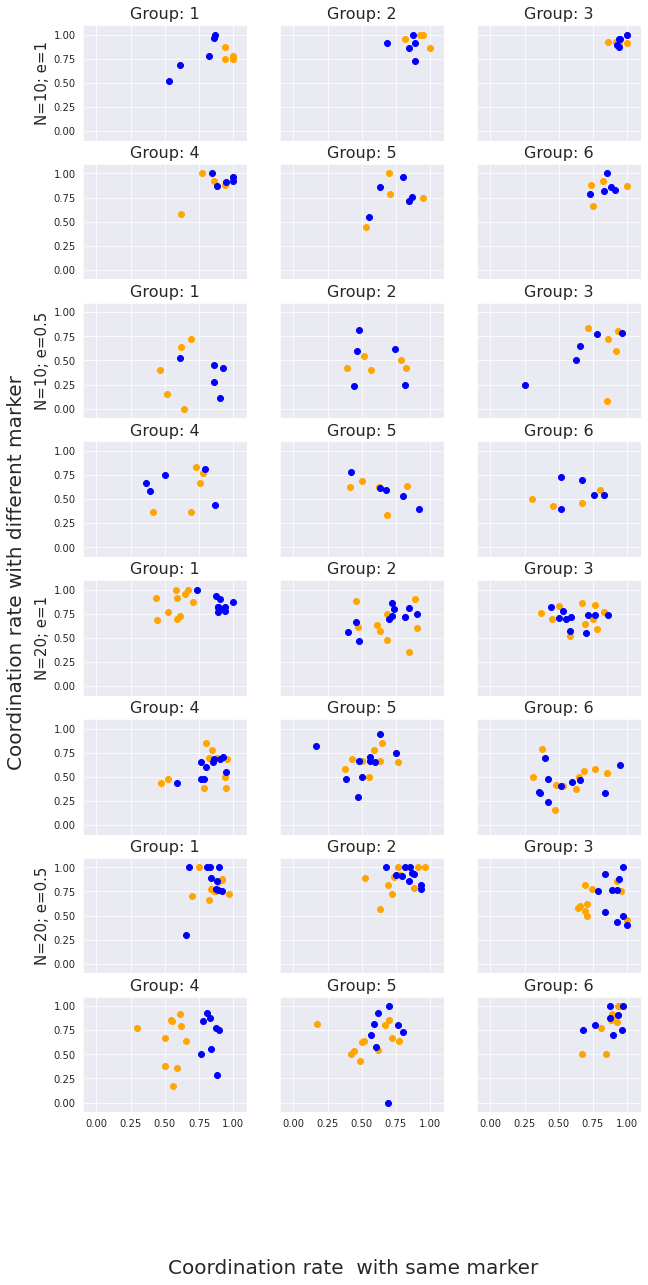

In [4]:
subplots_probability(dataframes_saved,round_ini = 0 ,round_end =40)

## Figure 2

In [5]:
#Obtain dataframes separated for zealots and non zealots

def obtain_zealots_dataframe(dataframes_saved,threshold):
    list_zealots = []
    dataframes_saved_non_zealots = [0]*len(dataframes_saved)
    dataframes_saved_zealots = [0]*len(dataframes_saved)
    for ij,players_info in enumerate(dataframes_saved):
        zealots = []

        for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
            players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
            zealots = []
            moda_zealots = []
            for ij2,player in enumerate(players_info_group):
                #Created list of zealots in our subgroup
                moda_agente = player[1]["acción"].mode()[0] 
                zealot = len(player[1]["acción"][player[1]["acción"] == moda_agente])
                if zealot>threshold:
                    player[0]["Zealot"] = "Yes"
                else:
                    player[0]["Zealot"] = "No"
        players_info_non_zealots = list(filter(lambda x:x[0]["Zealot"] == "No",players_info))
        players_info_zealots = list(filter(lambda x:x[0]["Zealot"] == "Yes",players_info))
        dataframes_saved_non_zealots[ij] = players_info_non_zealots
        dataframes_saved_zealots[ij] = players_info_zealots
    
    return dataframes_saved_zealots,dataframes_saved_non_zealots 

In [6]:
def subplots_probability_zealots(dataframes_saved,round_ini=0,round_end=40):
    
    modas = []
    for ij,players_info in enumerate(dataframes_saved):
        for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
            moda_group = []
            players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
            zealots = []
            moda_zealots = []
            for ij2,player in enumerate(players_info_group):
                #Created list of zealots in our subgroup
                if player[0]["Zealot"]:
                    moda_agente = player[1]["acción"].mode()[0] 
                    moda_group.append(moda_agente)
            #print(moda_group,ij)
            modas.append(round(np.average(moda_group)))         
    ijaux=0
    fig,ax =plt.subplots(8,3,sharex=True,sharey=True,figsize=(10,20))
    cmap = colors.ListedColormap(['orange', 'blue'])
    
    k = -1
    for ij,players_info in enumerate(dataframes_saved):
            group_2 = 0
            if (ij>2) and (np.mod(ij,2) != 0):
                group_2 = 3
            for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
                players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
                k+=1
                suc = []
                sampenl = []
                av_mark = []
                std_mark = []
                av_mark_2 = []
                std_mark_2 = []
                grupo = []
                grupo_2 = []

                for j in range(len(players_info_group)):
                    lista_prueba = [players_info_group[j][1]["payoff"].iloc[i] for i in range(round_ini,round_end)
                                    if players_info_group[j][1]["acción"].iloc[i]==modas[k]]
                    lista_prueba_2 = [players_info_group[j][1]["payoff"].iloc[i] for i in range(round_ini,round_end)
                                    if players_info_group[j][1]["acción"].iloc[i]!=modas[k]]
                    lista_dic = {"amarillo":0,"azul":1}
                    #lista_prueba = [lista_dic[lista_prueba[i]] for i in range(len(lista_prueba))]
                    #lista_prueba_2 = [lista_dic[lista_prueba_2[i]] for i in range(len(lista_prueba_2))]
                    av_mark.append(lista_prueba.count(1.0)/(round_end-round_ini))
                    av_mark_2.append(lista_prueba_2.count(1.0)/(round_end-round_ini))
                    grupo.append(players_info[j][0]["Marker"])
                    grupo_2.append(players_info[j][1]["success"].iloc[round_end])

                groupaux=0
                if group==4:
                    ijaux +=1
                if group>3:
                    groupaux= -3
                ax[ij+ijaux,group+groupaux-1].set_title("Group: "+str(group+group_2), fontsize=16)
                if (group+group_2)== 1 :
                        ax[ij+ijaux,group+groupaux-1].set_ylabel(es[ij],fontsize=15)
                plt.xlim((-0.1,1.1))
                plt.ylim((-0.1,1.1))
                for color in lista_dic.keys():
                    temp_x = list(filter(lambda x:grupo[x] == color,range(len(av_mark))))
                    plot_x = [av_mark[x] for x in temp_x]
                    plot_y = [av_mark_2[x] for x in temp_x]
                    ax[ij+ijaux,group+groupaux-1].scatter(plot_x,plot_y,label=color,c=cmap.colors[lista_dic[color]],cmap=cmap)
        #fig.savefig("subplots_success,"+str(round_end)+".jpg")
    return 

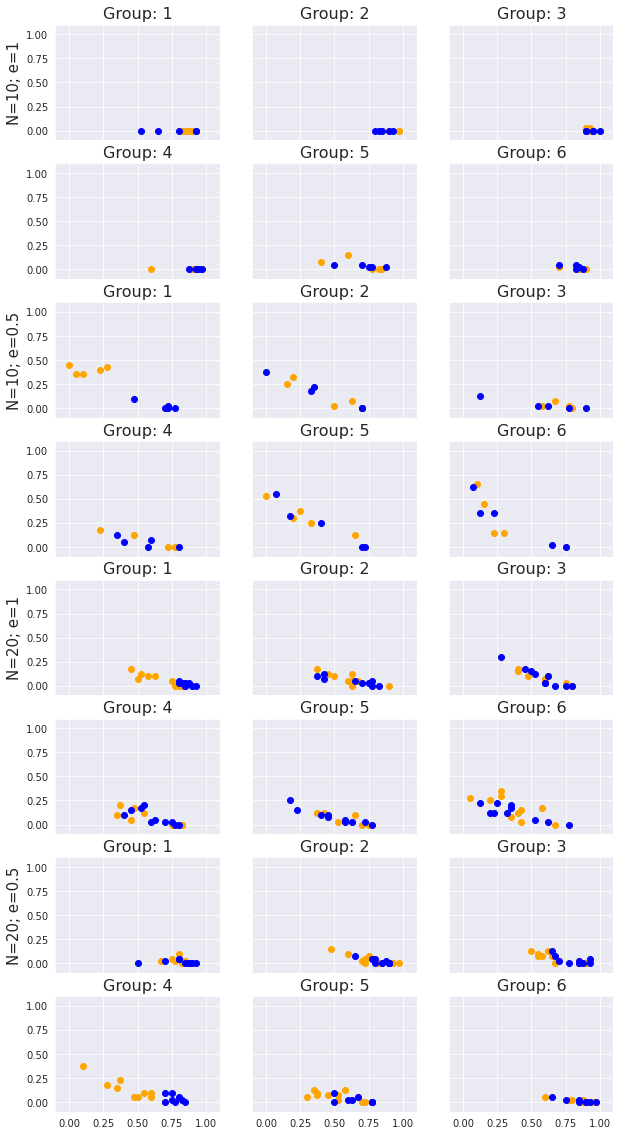

In [7]:
obtain_zealots_dataframe(dataframes_saved,70)
subplots_probability_zealots(dataframes_saved,round_ini=0,round_end=40)
#len(dataframes_saved)

## Figure 3

In [70]:
def figure_3(dataframes_saved,round_ini,round_end):
    ene = []
    average_x = []
    average_y = []
    var = []
    es = [1,0.5,1,1,0.5,0.5]
    for ij,players_info in enumerate(dataframes_saved):
            for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
                players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
                suc = []
                sampenl = []
                av_mark = []
                std_mark = []
                av_mark_2 = []
                std_mark_2 = []
                grupo = []
                grupo_2 = []

                for j in range(len(players_info_group)):
                    lista_prueba = [players_info_group[j][1]["payoff"].iloc[i] for i in range(round_ini,round_end)
                                    if players_info_group[j][1]["marker_partner"].iloc[i]==players_info_group[j][0]["Marker"]]
                    lista_prueba_2 = [players_info_group[j][1]["payoff"].iloc[i] for i in range(round_ini,round_end)
                                    if players_info_group[j][1]["marker_partner"].iloc[i]!=players_info_group[j][0]["Marker"]]
                    lista_dic = {"amarillo":0,"azul":1}
                    suc.append(players_info[j][1]["success"].iloc[-1])
                    av_mark.append(lista_prueba.count(1.0)/len(lista_prueba))
                    av_mark_2.append(lista_prueba_2.count(1.0)/len(lista_prueba_2))
                    grupo.append(players_info[j][0]["Marker"])
                    grupo_2.append(players_info[j][1]["success"].iloc[round_end])
                average_x.append(np.average(av_mark))
                average_y.append(np.average(av_mark_2))
                var.append(max(np.var(av_mark),np.std(av_mark_2)))
                ene.append("N: "+str(int(round(len(players_info_group)/100,1)*100))+", e: "+str(es[ij]))
    data_hyp2 = pd.DataFrame({"Coord with same marker":average_x,"Coord with diff marker":average_y,"Configuration":ene,"Standard deviation":var})
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_axes([0,0,1,1])
    sns.scatterplot(data=data_hyp2,x="Coord with same marker",y="Coord with diff marker",hue = "Configuration",
                size="Standard deviation",sizes=(15, 200),palette="Set1",ax=ax)
    ax.legend(bbox_to_anchor=(1.05, 1),fontsize=15)
    ax.set_xlabel("Coordination rate with same marker",fontsize=15)
    ax.set_ylabel("Coordination rate with different marker",fontsize=15)
    return

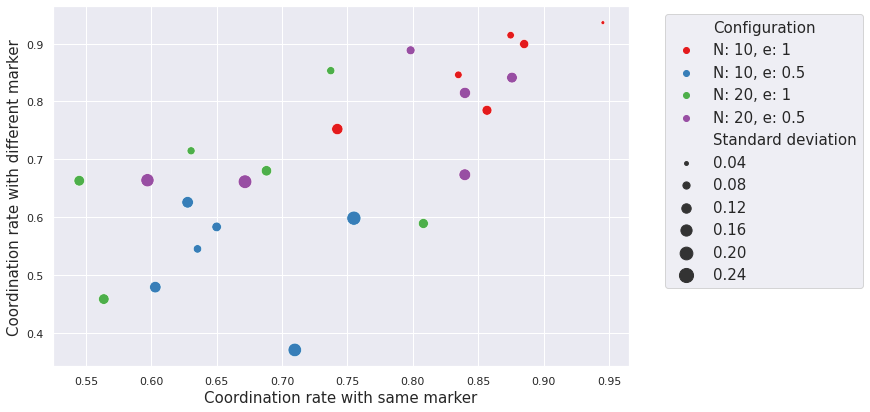

In [71]:
figure_3(dataframes_saved,0,40)

## Figure 4

In [111]:
def fig_4(dataframes_saved):
    dist_player_2_ev = []
    dist_player_1_ev = []
    dist_val = []
    for ij,players_info in enumerate(dataframes_saved):
        for ij2,player in enumerate(players_info):
            dist_player_2 = []
            dist_player_1 = []
            dist_player_2 = [player[1]["pay_2_val"].iloc[i] for i in range(len(player[1])) if math.isnan(player[1]["pay_2_val"].iloc[i]) == False]
            dist_player_1 = [player[1]["pay_1_val"].iloc[i] for i in range(len(player[1])) if math.isnan(player[1]["pay_1_val"].iloc[i]) == False]
            dist_val +=[dist_player_2[i]-dist_player_1[i] for i in range(len(dist_player_2))]
            dist_player_2_ev.append(np.average([dist_player_2[i]-dist_player_2[i-1] for i in range(1,len(dist_player_2))]))
            dist_player_1_ev.append(np.average([dist_player_1[i]-dist_player_1[i-1] for i in range(1,len(dist_player_1))]))
    fig_4 = pd.DataFrame({"Uncoordination":dist_player_1_ev,"Coordination":dist_player_2_ev})
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title("Evolution of the Likert scale choice",fontsize=15)
    sns.histplot(dist_player_1_ev,label = "Uncoordination",alpha = 0.7,ax=ax,bins=10,color="r")
    sns.histplot(dist_player_2_ev,label = "Coordination",alpha = 0.7,ax=ax,bins=10,color="b")
    ax.legend(fontsize=13)

    fig_2 = plt.figure(figsize=(8,6))
    ax_2 = fig_2.add_axes([0,0,1,1])
    ax_2.set_title("Distribution of the differences in the aspirations ",fontsize=15)
    sns.histplot(dist_val,ax=ax_2,bins=10)
    return

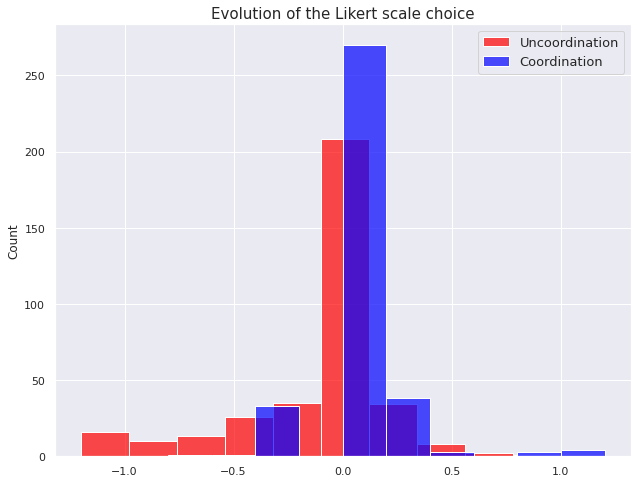

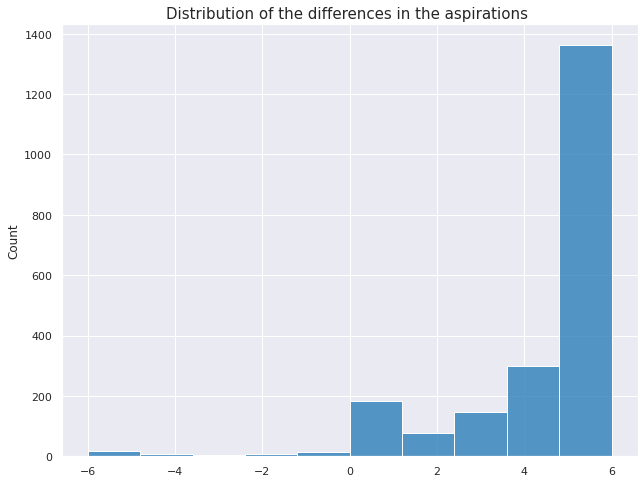

In [112]:
fig_4(dataframes_saved)

## Figure 5

In [189]:
def fig_5(dataframes_saved,round_ini,round_end):
    es = [1,0.5,1,1,0.5,0.5]
    norm_comp = []
    size_e = []
    suc = []
    for ij,players_info in enumerate(dataframes_saved):
        for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
            players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
            for ij2,player in enumerate(players_info_group):
                norm_comp.append(int(list(player[2]["selectionYellow"]).count(1.0)))
                size_e.append("N: "+str(int(round(len(players_info_group)/100,1)*100))+", e: "+str(es[ij]))
                suc.append(player[1]["global_payoff"].iloc[-1])
    fig_5 = pd.DataFrame({"norm_comp":norm_comp,"size_e":size_e,"success":suc})
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_axes([0,0,1,1])
    sns.stripplot(data=fig_5,x="norm_comp",y="success",hue="size_e",ax=ax,s=10)
    ax.legend(bbox_to_anchor=(1.05, 1),fontsize=20)
    ax.set_xlabel("norm compliance",fontsize=20)
    ax.set_ylabel("success",fontsize=20)
    ax.grid()
    return

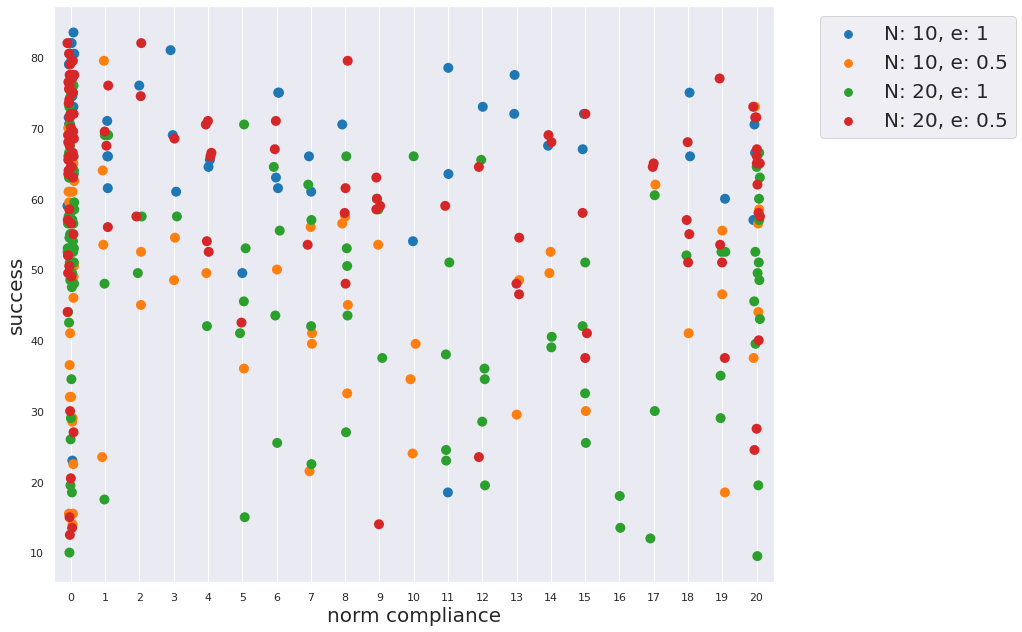

In [190]:
fig_5(dataframes_saved,0,75)

## Fig 6

In [230]:
def fig_6_1(dataframes_saved):
    dataframes_saved_2 = dataframes_saved[:2]
    coord_rate_total = []
    coord_rate_unique = []
    for ij,players_info  in enumerate(dataframes_saved_2):
        round_ini = 0
        round_end = 40
        for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
            players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
            coord_rate = []
            for player in players_info_group:
                a = [player[1]["payoff"].iloc[i] for i in range(round_ini,round_end)].count(1.0)
                coord_rate.append(a)
                coord_rate_unique.append(a)
            coord_rate_total.append(coord_rate)
    #del coord_rate_total[3]
    os.chdir(start_point)
    %run RL_marker_trax.py
    %run RL_simpler_trax.py
    round_end = 40
    bins = 40
    ##Insert loop
    learning_rate = [0.7,0.4,0.4,0.4,0.3,0.15,0.6,0.8,0.5,0.5,0.4,0.8]
    #for N = 20
    #learning_rate = [0.6,0.6,1.0,0.7,0.4,0.5,0.2,0.4,0.4,0.3,0.25,0.35]
    es = [1,1,1,1,1,1,0.5,0.5,0.5,0.5,0.5,0.5] 
    fig,ax =plt.subplots(4,3,sharex=True,figsize=(10,20))
    fig.suptitle("Experimental and simulated cooordination rates for N = 10",fontsize=20)
    for var_aux in range(12):
        print(var_aux)
        ax_0 = var_aux//3
        ax_1 = var_aux%3
        final_results = RL_simpler_trax(learning_rate[var_aux],es[var_aux])
        final_results_mark = RL_marker_trax(learning_rate[var_aux],es[var_aux])
        ax[ax_0,ax_1].set_ylim([0,7])
        #ax.set_xlim([0,10])
        if ax_1 == 0:
            ax[ax_0,ax_1].set_ylabel(study_sessions[ax_0])

        ax[ax_0,ax_1].hist(coord_rate_total[var_aux],range=(0,40),bins=40,label ="Experimental coordination rate")
        ax[ax_0,ax_1].plot(np.linspace(0,round_end,bins),final_results[0],label = "Simpler RL",linewidth = 4,color="r")
        ax[ax_0,ax_1].fill_between(np.linspace(0,round_end,bins), np.array(final_results[0])-2*np.array(final_results[1]), np.array(final_results[0])+2*np.array(final_results[1]),alpha=0.2,color="r")
        ax[ax_0,ax_1].plot(np.linspace(0,round_end,bins),final_results_mark[0],label = "Marked RL",linewidth = 4,color = "g")
        ax[ax_0,ax_1].fill_between(np.linspace(0,round_end,bins), np.array(final_results_mark[0])-2*np.array(final_results_mark[1]), np.array(final_results_mark[0])+2*np.array(final_results_mark[1]),alpha=0.2,color="g")
        if var_aux == 2:
            ax[ax_0,ax_1].legend(bbox_to_anchor=(1.05, 1),fontsize=15)



    av_learning = np.average(learning_rate)
    final_results = RL_simpler_trax(av_learning,1)
    final_results_mark = RL_marker_trax(av_learning,0.5)
    coord_hist = np.histogram(coord_rate_unique,bins=40,range=(0,40))[0]
    scaler = sum(final_results[0])/sum(coord_hist)
    coord_hist = [coord_hist[i]*scaler for i in range(len(coord_hist))]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(np.linspace(0,round_end,bins),coord_hist,width = 1,label = "Experimental coordination rate")
    ax.plot(np.linspace(0,round_end,bins),final_results[0],label = "Simpler RL",linewidth = 4,color="r")
    ax.fill_between(np.linspace(0,round_end,bins), np.array(final_results[0])-np.array(final_results[1]), np.array(final_results[0])+np.array(final_results[1]),alpha=0.2,color="r")
    ax.plot(np.linspace(0,round_end,bins),final_results_mark[0],label = "Marked RL",linewidth = 4,color = "g")
    ax.fill_between(np.linspace(0,round_end,bins), np.array(final_results_mark[0])-np.array(final_results_mark[1]), np.array(final_results_mark[0])+np.array(final_results_mark[1]),alpha=0.2,color="g")
    ax.set_title("Coordination rate for N=10 in the marked case",fontsize=20)
    ax.legend(bbox_to_anchor=(1, 1),fontsize=12)
    ax.set_ylim([0,4])
    return

0
1
2
3
4
5
6
7
8
9
10
11


<Figure size 432x288 with 0 Axes>

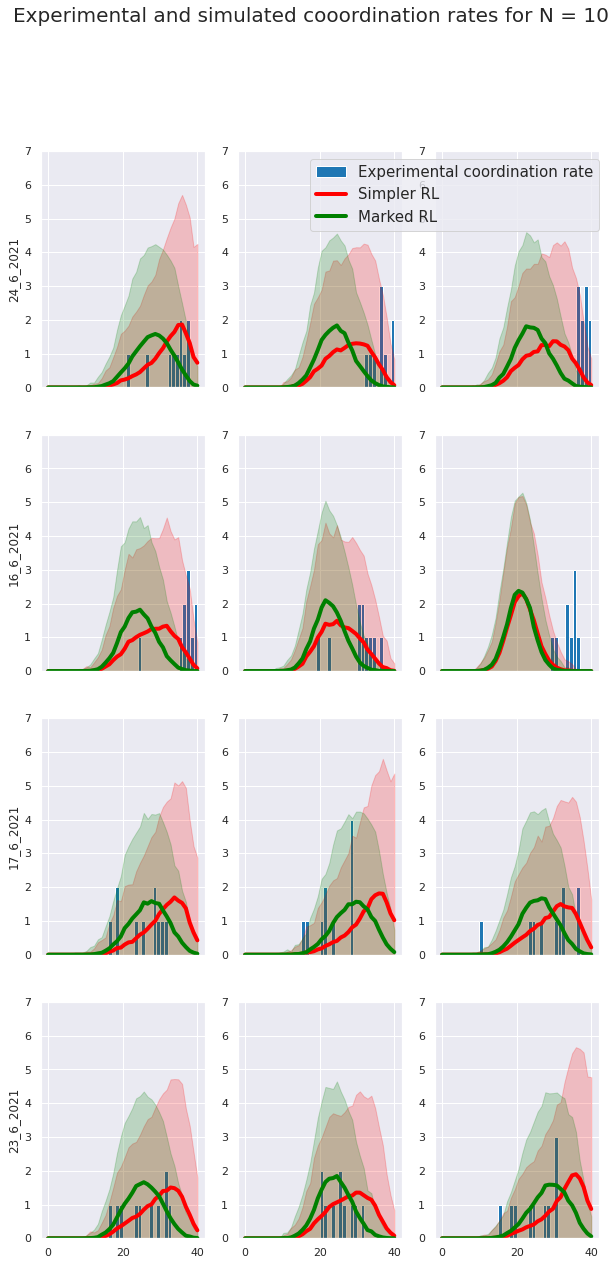

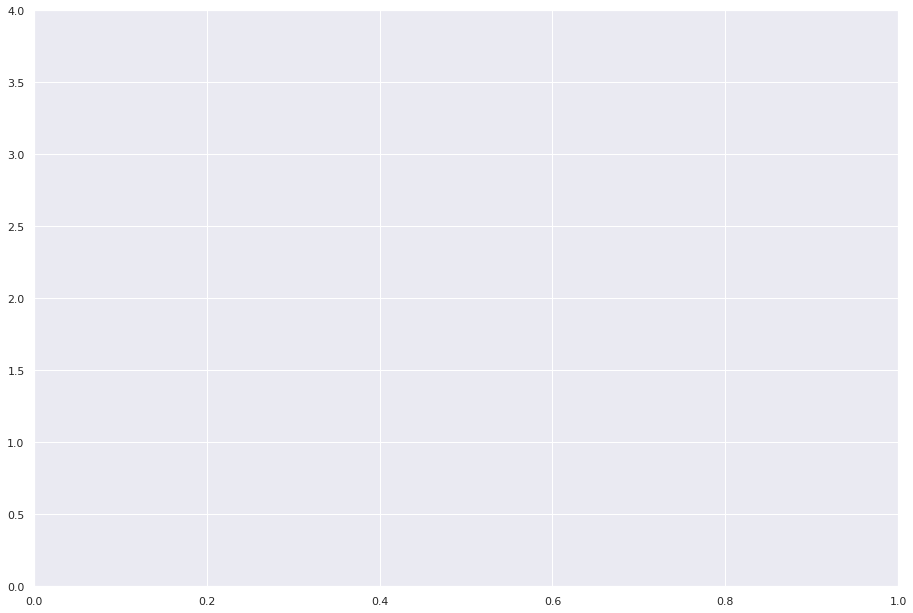

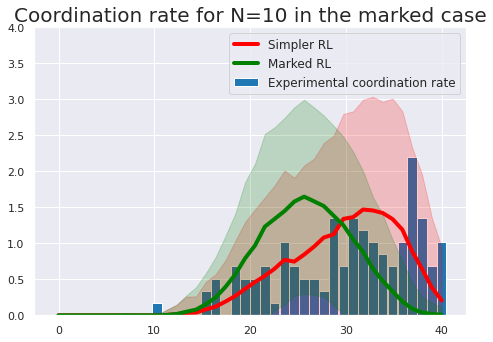

In [231]:
fig_6_1(dataframes_saved)

(0.0, 4.0)

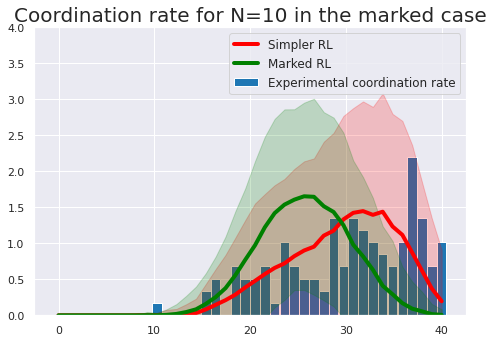

In [ ]:
dataframes_saved_2 = dataframes_saved[2:]
coord_rate_total = []
coord_rate_unique = []
for ij,players_info  in enumerate(dataframes_saved_2):
    round_ini = 0
    round_end = 40
    for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
        players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
        coord_rate = []
        for player in players_info_group:
            a = [player[1]["payoff"].iloc[i] for i in range(round_ini,round_end)].count(1.0)
            coord_rate.append(a)
            coord_rate_unique.append(a)
        coord_rate_total.append(coord_rate)
#del coord_rate_total[3]

0
1
2
3
4
5
6
7
8
9
10
11


TypeError: 'Text' object is not callable

<Figure size 432x288 with 0 Axes>

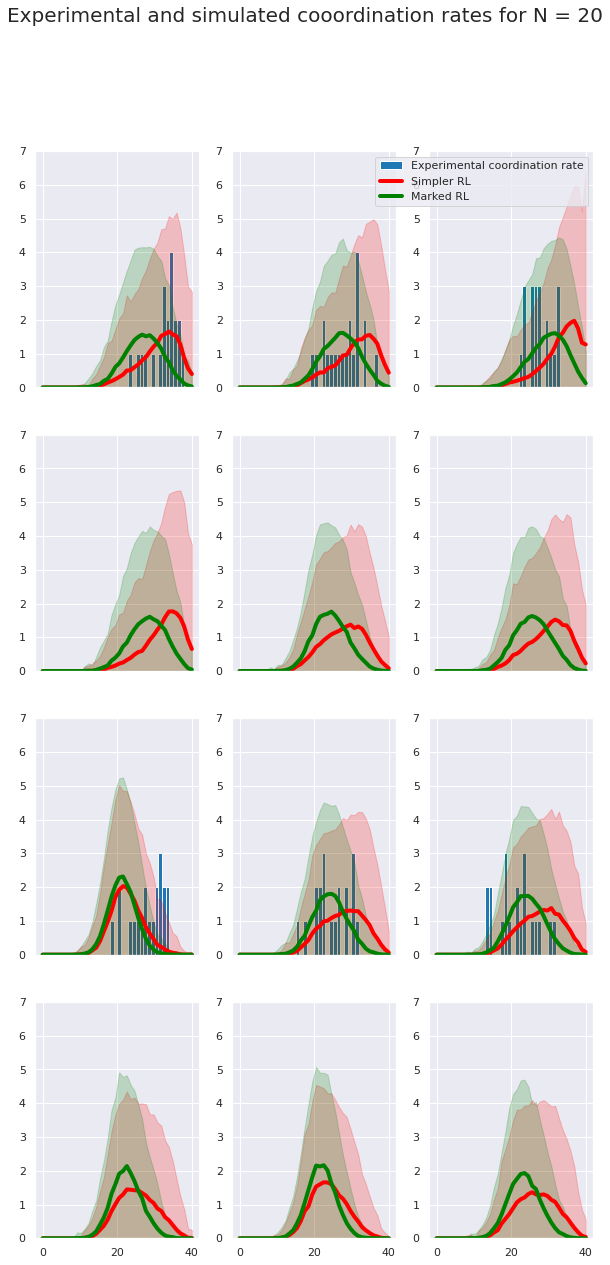

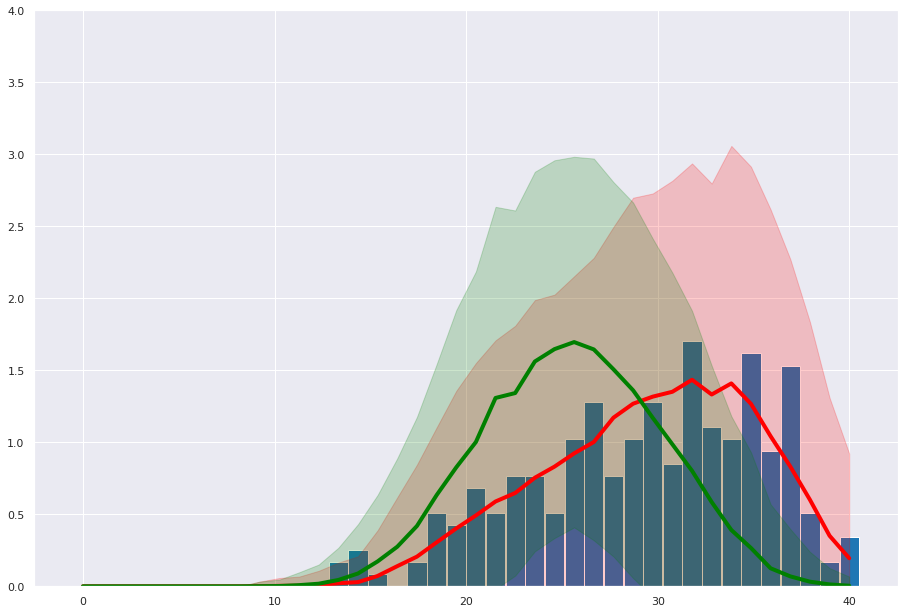

In [198]:
os.chdir(start_point)
%run RL_marker_trax.py
%run RL_simpler_trax.py
round_end = 40
bins = 40
##Insert loop
#learning_rate = [0.7,0.4,0.4,0.4,0.3,0.15,0.6,0.8,0.5,0.5,0.4,0.8]
#for N = 20
learning_rate = [0.6,0.6,1.0,0.7,0.4,0.5,0.2,0.4,0.4,0.3,0.25,0.35]
es = [1,1,1,1,1,1,0.5,0.5,0.5,0.5,0.5,0.5] 
fig,ax =plt.subplots(4,3,sharex=True,figsize=(10,20))
fig.suptitle("Experimental and simulated cooordination rates for N = 20",fontsize=20)
for var_aux in range(12):
    print(var_aux)
    ax_0 = var_aux//3
    ax_1 = var_aux%3
    final_results = RL_simpler_trax(learning_rate[var_aux],es[var_aux])
    final_results_mark = RL_marker_trax(learning_rate[var_aux],es[var_aux])
    ax[ax_0,ax_1].set_ylim([0,7])
    #ax.set_xlim([0,10]
    #if ax_1 == 0:
        #ax[ax_0,ax_1].set_ylabel(study_sessions[ax_0])
    
    ax[ax_0,ax_1].hist(coord_rate_total[var_aux],range=(0,40),bins=40,label ="Experimental coordination rate")
    ax[ax_0,ax_1].plot(np.linspace(0,round_end,bins),final_results[0],label = "Simpler RL",linewidth = 4,color="r")
    ax[ax_0,ax_1].fill_between(np.linspace(0,round_end,bins), np.array(final_results[0])-2*np.array(final_results[1]), np.array(final_results[0])+2*np.array(final_results[1]),alpha=0.2,color="r")
    ax[ax_0,ax_1].plot(np.linspace(0,round_end,bins),final_results_mark[0],label = "Marked RL",linewidth = 4,color = "g")
    ax[ax_0,ax_1].fill_between(np.linspace(0,round_end,bins), np.array(final_results_mark[0])-2*np.array(final_results_mark[1]), np.array(final_results_mark[0])+2*np.array(final_results_mark[1]),alpha=0.2,color="g")
    if var_aux == 2:
        ax[ax_0,ax_1].legend(loc = "upper right")


fig = plt.figure(figsize=(12,8))
ax= fig.add_axes([0,0,1,1])
ax.set_ylim(0,4)
av_learning = np.average(learning_rate)
final_results = RL_simpler_trax(av_learning,1)
final_results_mark = RL_marker_trax(av_learning,0.5)
coord_hist = np.histogram(coord_rate_unique,bins=40,range=(0,40))[0]
scaler = sum(final_results[0])/sum(coord_hist)
coord_hist = [coord_hist[i]*scaler for i in range(len(coord_hist))]
plt.bar(np.linspace(0,round_end,bins),coord_hist,width = 1,label = "Experimental coordination rate")
plt.plot(np.linspace(0,round_end,bins),final_results[0],label = "Simpler RL",linewidth = 4,color="r")
plt.fill_between(np.linspace(0,round_end,bins), np.array(final_results[0])-np.array(final_results[1]), np.array(final_results[0])+np.array(final_results[1]),alpha=0.2,color="r")
plt.plot(np.linspace(0,round_end,bins),final_results_mark[0],label = "Marked RL",linewidth = 4,color = "g")
plt.fill_between(np.linspace(0,round_end,bins), np.array(final_results_mark[0])-np.array(final_results_mark[1]), np.array(final_results_mark[0])+np.array(final_results_mark[1]),alpha=0.2,color="g")
ax.title("Coordination rate for N=20",fontsize=20)
ax.legend(bbox_to_anchor=(1.05, 1),fontsize=15)

In [ ]:

fig = plt.figure(figsize=(12,8))
plt.ylim(0,4)
av_learning = np.average(learning_rate)
final_results = RL_simpler_trax(av_learning,1)
final_results_mark = RL_marker_trax(av_learning,1)
coord_hist = np.histogram(coord_rate_unique,bins=40,range=(0,40))[0]
scaler = sum(final_results[0])/sum(coord_hist)
coord_hist = [coord_hist[i]*scaler for i in range(len(coord_hist))]
plt.bar(np.linspace(0,round_end,bins),coord_hist,width = 1,label = "Experimental coordination rate")
plt.plot(np.linspace(0,round_end,bins),final_results[0],label = "Simpler RL",linewidth = 4,color="r")
plt.fill_between(np.linspace(0,round_end,bins), np.array(final_results[0])-np.array(final_results[1]), np.array(final_results[0])+np.array(final_results[1]),alpha=0.2,color="r")
plt.plot(np.linspace(0,round_end,bins),final_results_mark[0],label = "Marked RL",linewidth = 4,color = "g")
plt.fill_between(np.linspace(0,round_end,bins), np.array(final_results_mark[0])-np.array(final_results_mark[1]), np.array(final_results_mark[0])+np.array(final_results_mark[1]),alpha=0.2,color="g")
plt.title("Coordination rate for N=20, e=1 in the marked case")
plt.legend()

## Commentaries over the grouped sessions


### Comparing the homophily parameter with the rate of success depending on the marker of the partner. PAYOFF-MARKER_PARTNER 0
* The first thing that we did and makes sense with the results of the paper. We created the variable (success prob with one marker, success prob with the other marker). Then, we measured for each agent, the distance to the line that defines the equal probability for both markers, only because it is symmetric. Then we make a histogram  of this distances for both e. -What we found is that the distribution for <i>e=1</i> is slightly more picuda than the one with <i>e=0.5</i>. It is symmetric, but interesting to note the difference in the organization of the points between the two <i>e</i>.


In [8]:
#Cálculo de la matriz A de aciertos para cada agente
for ij,players_info in enumerate(dataframes_saved):
    for ij2,player in enumerate(players_info):
        A = np.zeros((2,2))
        acción_partner = player[1]["acción_partner"]-1
        #marker_partner = [lista_dic[player[1]["marker_partner"].iloc[i]] for i in range(len(player[1]))]
        marker_partner = [0 if player[1]["marker_partner"].iloc[i] == player[0]["Marker"] else 1 for i in range(len(player[1])) ]
        for ij3 in range(len(acción_partner)):
              if np.isnan(acción_partner.iloc[ij3]) == False:
                if player[1]["payoff"].iloc[i] == 1.0:
                    #Solo matriz de éxitos
                    A[int(acción_partner.iloc[ij3]),int(marker_partner[ij3])] += 1
        #A = A/np.sum(A)
        print(A,ij,ij2)

[[0. 0.]
 [0. 0.]] 0 0
[[ 0.  6.]
 [31. 38.]] 0 1
[[ 2.  1.]
 [31. 41.]] 0 2
[[ 0.  4.]
 [34. 37.]] 0 3
[[ 3.  2.]
 [32. 38.]] 0 4
[[ 0.  4.]
 [35. 36.]] 0 5
[[ 0.  6.]
 [32. 37.]] 0 6
[[ 2.  0.]
 [34. 39.]] 0 7
[[0. 0.]
 [0. 0.]] 0 8
[[ 1.  3.]
 [29. 42.]] 0 9
[[ 2.  4.]
 [33. 36.]] 0 10
[[ 4.  0.]
 [24. 47.]] 0 11
[[ 0.  3.]
 [33. 39.]] 0 12
[[0. 0.]
 [0. 0.]] 0 13
[[ 1.  6.]
 [33. 35.]] 0 14
[[ 7.  0.]
 [27. 41.]] 0 15
[[ 1.  2.]
 [38. 34.]] 0 16
[[ 7.  3.]
 [27. 38.]] 0 17
[[ 3.  0.]
 [36. 35.]] 0 18
[[ 0.  1.]
 [31. 43.]] 0 19
[[ 0.  2.]
 [34. 39.]] 0 20
[[ 1.  0.]
 [31. 43.]] 0 21
[[ 0.  1.]
 [25. 49.]] 0 22
[[ 1.  1.]
 [33. 40.]] 0 23
[[ 0.  0.]
 [28. 47.]] 0 24
[[ 2.  2.]
 [30. 41.]] 0 25
[[ 0.  0.]
 [36. 39.]] 0 26
[[ 0.  1.]
 [29. 45.]] 0 27
[[ 0.  2.]
 [31. 42.]] 0 28
[[ 3.  0.]
 [30. 42.]] 0 29
[[ 1.  2.]
 [29. 43.]] 0 30
[[ 1.  1.]
 [34. 39.]] 0 31
[[ 3.  0.]
 [28. 44.]] 0 32
[[ 0.  2.]
 [32. 41.]] 0 33
[[ 1.  2.]
 [27. 45.]] 0 34
[[ 0.  1.]
 [31. 43.]] 0 35
[[0. 0.]
 [0. 

 [54. 19.]] 5 44
[[0. 0.]
 [0. 0.]] 5 45
[[0. 0.]
 [0. 0.]] 5 46
[[ 2.  3.]
 [47. 23.]] 5 47
[[0. 0.]
 [0. 0.]] 5 48
[[0. 0.]
 [0. 0.]] 5 49
[[ 2.  2.]
 [53. 18.]] 5 50
[[ 0.  0.]
 [61. 14.]] 5 51
[[ 2.  0.]
 [55. 18.]] 5 52
[[0. 0.]
 [0. 0.]] 5 53
[[ 2.  0.]
 [52. 21.]] 5 54
[[ 2.  1.]
 [54. 18.]] 5 55


### Searching for zealots

* Search for zealots, make a dataframe of zealots and non-zealots and make the plot of probabilities of succeding. 

In [11]:
#Obtain dataframes separated for zealots and non zealots

def obtain_zealots_dataframe(dataframes_saved,threshold):
    list_zealots = []
    dataframes_saved_non_zealots = [0]*len(dataframes_saved)
    dataframes_saved_zealots = [0]*len(dataframes_saved)
    for ij,players_info in enumerate(dataframes_saved):
        zealots = []

        for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
            players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
            zealots = []
            moda_zealots = []
            for ij2,player in enumerate(players_info_group):
                #Created list of zealots in our subgroup
                moda_agente = player[1]["acción"].mode()[0] 
                zealot = len(player[1]["acción"][player[1]["acción"] == moda_agente])
                if zealot>threshold:
                    player[0]["Zealot"] = "Yes"
                else:
                    player[0]["Zealot"] = "No"
        players_info_non_zealots = list(filter(lambda x:x[0]["Zealot"] == "No",players_info))
        players_info_zealots = list(filter(lambda x:x[0]["Zealot"] == "Yes",players_info))
        dataframes_saved_non_zealots[ij] = players_info_non_zealots
        dataframes_saved_zealots[ij] = players_info_zealots
    
    return dataframes_saved_zealots,dataframes_saved_non_zealots 

In [12]:
def subplots_probability_zealots(dataframes_saved,round_ini=0,round_end=40):
    
    modas = []
    for ij,players_info in enumerate(dataframes_saved):
        for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
            moda_group = []
            players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
            zealots = []
            moda_zealots = []
            for ij2,player in enumerate(players_info_group):
                #Created list of zealots in our subgroup
                if player[0]["Zealot"]:
                    moda_agente = player[1]["acción"].mode()[0] 
                    moda_group.append(moda_agente)
            #print(moda_group,ij)
            modas.append(round(np.average(moda_group)))
            
    import matplotlib
    ijaux=0
    fig,ax =plt.subplots(8,3,sharex=True,sharey=True,figsize=(10,20))
    cmap = matplotlib.colors.ListedColormap(['orange', 'blue'])
    
    k = -1
    for ij,players_info in enumerate(dataframes_saved):
            group_2 = 0
            if (ij>2) and (np.mod(ij,2) != 0):
                group_2 = 3
            for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
                players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
                k+=1
                suc = []
                sampenl = []
                av_mark = []
                std_mark = []
                av_mark_2 = []
                std_mark_2 = []
                grupo = []
                grupo_2 = []

                for j in range(len(players_info_group)):
                    lista_prueba = [players_info_group[j][1]["payoff"].iloc[i] for i in range(round_ini,round_end)
                                    if players_info_group[j][1]["acción"].iloc[i]==modas[k]]
                    lista_prueba_2 = [players_info_group[j][1]["payoff"].iloc[i] for i in range(round_ini,round_end)
                                    if players_info_group[j][1]["acción"].iloc[i]!=modas[k]]
                    lista_dic = {"amarillo":0,"azul":1}
                    #lista_prueba = [lista_dic[lista_prueba[i]] for i in range(len(lista_prueba))]
                    #lista_prueba_2 = [lista_dic[lista_prueba_2[i]] for i in range(len(lista_prueba_2))]
                    av_mark.append(lista_prueba.count(1.0)/(round_end-round_ini))
                    av_mark_2.append(lista_prueba_2.count(1.0)/(round_end-round_ini))
                    grupo.append(players_info[j][0]["Marker"])
                    grupo_2.append(players_info[j][1]["success"].iloc[round_end])

                groupaux=0
                if group==4:
                    ijaux +=1
                if group>3:
                    groupaux= -3
                ax[ij+ijaux,group+groupaux-1].set_title("Group: "+str(group+group_2), fontsize=16)
                if (group+group_2)== 1 :
                        ax[ij+ijaux,group+groupaux-1].set_ylabel(es[ij],fontsize=15)
                plt.xlim((-0.1,1.1))
                plt.ylim((-0.1,1.1))
                for color in lista_dic.keys():
                    temp_x = list(filter(lambda x:grupo[x] == color,range(len(av_mark))))
                    plot_x = [av_mark[x] for x in temp_x]
                    plot_y = [av_mark_2[x] for x in temp_x]
                    ax[ij+ijaux,group+groupaux-1].scatter(plot_x,plot_y,label=color,c=cmap.colors[lista_dic[color]],cmap=cmap)
        #fig.savefig("subplots_success,"+str(round_end)+".jpg")
    return 

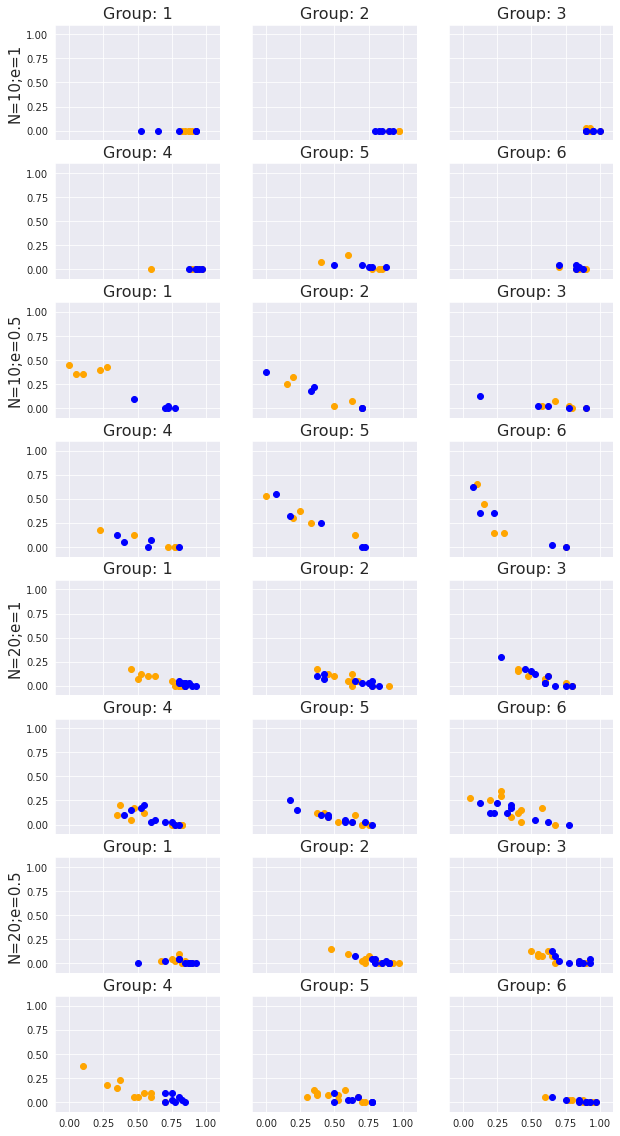

In [13]:
obtain_zealots_dataframe(dataframes_saved,70)
subplots_probability_zealots(dataframes_saved,round_ini=0,round_end=40)
#len(dataframes_saved)

In [12]:
def ev_coordination_zealots(dataframes_saved):
    modas = []
    for ij,players_info in enumerate(dataframes_saved):
        for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
            moda_group = []
            players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
            zealots = []
            moda_zealots = []
            for ij2,player in enumerate(players_info_group):
                #Created list of zealots in our subgroup
                    moda_agente = player[1]["acción"].mode()[0] 
                    moda_group.append(moda_agente)
                    
            #print(moda_group,ij)
            modas +=[round(np.average(moda_group))]*len(players_info_group)
    ev_cordination_zealots = [0]*len(player[1])
    for ij,players_info in enumerate(dataframes_saved):
        for player in players_info:
            k1 = 0
            for ronda in range(75):
                if player[1]["acción"].iloc[ronda] == modas[k1]:
                    ev_cordination_zealots[ronda] += 1/len(modas) 
                k1 +=1

    return ev_cordination_zealots

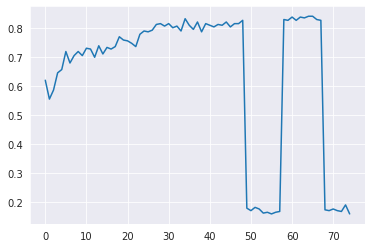

In [13]:
plt.plot(ev_coordination_zealots(dataframes_saved))

In [14]:
dataframes_saved_zealots,dataframes_saved_non_zealots = obtain_zealots_dataframe(dataframes_saved,72)

### Looking for correlation with first decision

 * Perhaps the criterion with respect which equilibria go is related with the first success 

In [16]:
def subplots_probability_first_success(dataframes_saved,round_ini,round_end,title=""):
    import matplotlib
    fig,ax =plt.subplots(len(dataframes_saved),3,sharex=True,sharey=True,figsize=(12,8))
    fig.suptitle("Probability of succeding with first reinforce vs probability of the other,"+str(title))
    cmap = matplotlib.colors.ListedColormap(['orange', 'blue'])
    for ij,players_info in enumerate(dataframes_saved):
        for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
            players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
            suc = []
            sampenl = []
            av_mark = []
            std_mark = []
            av_mark_2 = []
            std_mark_2 = []
            grupo = []
            grupo_2 = []
            
            for j in range(len(players_info_group)):
                first_success = [players_info_group[j][1]["acción"].iloc[i] for i in range(len(players_info_group[j][1])) 
                                 if players_info[j][1]["payoff"].iloc[i] == 1.0][0]
                lista_prueba = [players_info_group[j][1]["acción"].iloc[i] for i in range(round_ini,round_end)
                                if players_info_group[j][1]["acción"].iloc[i] == first_success]
                lista_prueba_2 = [players_info_group[j][1]["acción"].iloc[i] for i in range(round_ini,round_end)
                                  if players_info_group[j][1]["acción"].iloc[i] != first_success]
                suc.append(players_info[j][1]["success"].iloc[-1])
                av_mark.append(len(lista_prueba))
                av_mark_2.append(len(lista_prueba_2))
                grupo.append(players_info[j][0]["Marker"])
                grupo_2.append(players_info[j][1]["success"].iloc[round_end])
            if group <4:
                #ax[ij,group-1] = sns.scatterplot(x=av_mark,y=av_mark_2,hue=grupo,size=grupo_2).set_title(study_sessions[ij]+','+str(group))
                ax[ij,group-1].scatter(av_mark,av_mark_2,c=list(map(lista_dic.get,grupo)),cmap=cmap)
                if group == 1 :
                    ax[ij,group-1].set_ylabel(study_sessions[ij])
                #plt.xlabel("Aciertos con azul")
                #plt.ylabel("Aciertos con amarillo")
                #plt.xlim((-0.1,1.1))
                #plt.ylim((-0.1,1.1))
            #sns.scatterplot(x=av_mark_2,y=suc,hue=grupo)
            #plt.scatter(av_mark_2,suc,label="error",c=grupo)
            #plt.scatter(suc,sampenl,label = study_sessions[ij])
    #fig.savefig("subplots_success_first,"+str(round_end)+".jpg")
    return 


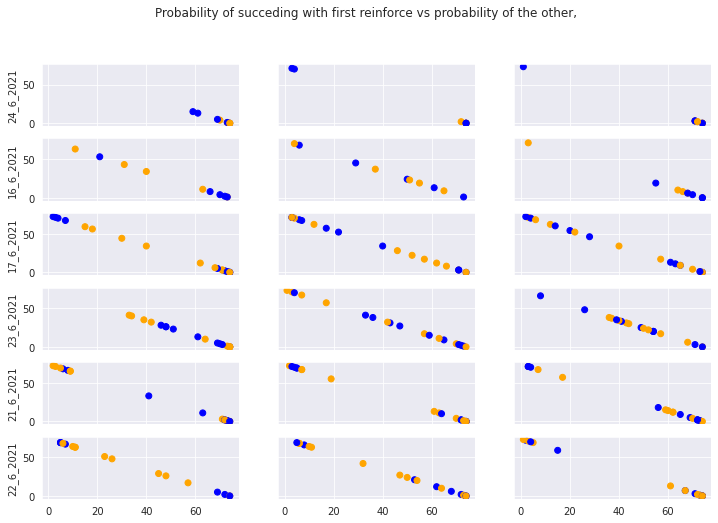

In [17]:
subplots_probability_first_success(dataframes_saved,0,74)

In [18]:
def subplots_probability_action(dataframes_saved,round_ini,round_end,title=""):
    import matplotlib
    fig,ax =plt.subplots(len(dataframes_saved),3,sharex=True,sharey=True,figsize=(15,10))
    fig.suptitle("Probability of succeding with yellow vs probability of succeding with both actions,"+str(title))
    cmap = matplotlib.colors.ListedColormap(['orange', 'blue'])
    for ij,players_info in enumerate(dataframes_saved):
        for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
            players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
            av_mark = []
            std_mark = []
            av_mark_2 = []
            std_mark_2 = []
            grupo = []
            grupo_2 = []
            for j in range(len(players_info_group)):
                lista_prueba = [players_info_group[j][1]["payoff"].iloc[i] for i in range(round_ini,round_end)
                                if players_info_group[j][1]["acción"].iloc[i]==1]
                lista_prueba_2 = [players_info_group[j][1]["payoff"].iloc[i] for i in range(round_ini,round_end)
                                if players_info_group[j][1]["acción"].iloc[i]==2]
                av_mark.append(lista_prueba.count(1.0)/(round_end-round_ini))
                av_mark_2.append(lista_prueba_2.count(1.0)/(round_end-round_ini))
                grupo.append(players_info[j][0]["Marker"])
                grupo_2.append(players_info[j][1]["success"].iloc[round_end])
            if group <4:
                ax[ij,group-1].scatter(av_mark,av_mark_2,c=list(map(lista_dic.get,grupo)),cmap=cmap)
                if group == 1 :
                    ax[ij,group-1].set_ylabel(study_sessions[ij])
                plt.xlim((-0.1,1.1))
                plt.ylim((-0.1,1.1))
    fig.savefig("subplots_success_action,"+str(round_end)+".jpg")
    return 


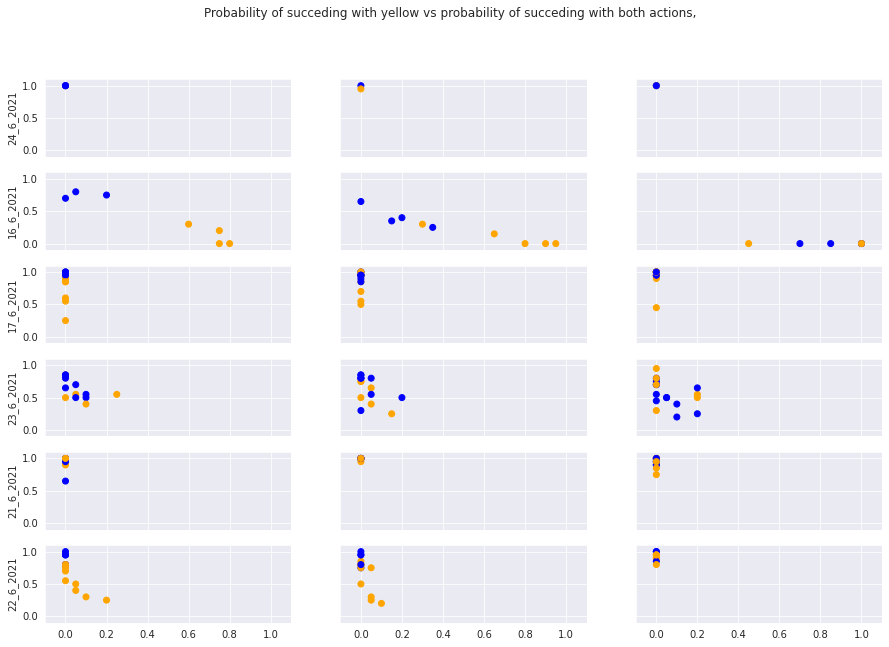

In [19]:
subplots_probability_action(dataframes_saved_non_zealots,40,60)

### Sesgo en acciones

* Hay un sesgo, no sé si sucede también con N = 10, tendiente al círculo como forma predominante, independientemente del grupo. También está correlacionado con que gran parte de los zealots tienden al círculo.

In [20]:
for i in range(len(dataframes_saved)):
    print(len(dataframes_saved_zealots[i]),len(dataframes_saved_non_zealots[i]))

37 21
14 46
15 45
13 46
26 34
20 36


In [21]:
ij

5

In [22]:
for ij,players_info in enumerate(dataframes_saved_zealots):
    for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
        players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
        print(es[ij],group,len(players_info_group))


N=10;e=1 1 6
N=10;e=1 2 7
N=10;e=1 3 7
N=10;e=1 4 8
N=10;e=1 5 4
N=10;e=1 6 5
N=10;e=0.5 1 3
N=10;e=0.5 2 1
N=10;e=0.5 3 3
N=10;e=0.5 4 4
N=10;e=0.5 5 3
N=10;e=0.5 6 0
N=20;e=1 1 8
N=20;e=1 2 2
N=20;e=1 3 5
N=20;e=1 1 7
N=20;e=1 2 4
N=20;e=1 3 2
N=20;e=0.5 1 11
N=20;e=0.5 2 9
N=20;e=0.5 3 6
N=20;e=0.5 1 4
N=20;e=0.5 2 5
N=20;e=0.5 3 11


In [23]:
for ij,players_info in enumerate(dataframes_saved):
    for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
        players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
        print(es[ij],group,len(players_info_group))

N=10;e=1 1 10
N=10;e=1 2 9
N=10;e=1 3 10
N=10;e=1 4 10
N=10;e=1 5 10
N=10;e=1 6 9
N=10;e=0.5 1 10
N=10;e=0.5 2 10
N=10;e=0.5 3 10
N=10;e=0.5 4 10
N=10;e=0.5 5 10
N=10;e=0.5 6 10
N=20;e=1 1 20
N=20;e=1 2 20
N=20;e=1 3 20
N=20;e=1 1 20
N=20;e=1 2 19
N=20;e=1 3 20
N=20;e=0.5 1 20
N=20;e=0.5 2 20
N=20;e=0.5 3 20
N=20;e=0.5 1 18
N=20;e=0.5 2 19
N=20;e=0.5 3 19


0
1
2
3
4
5


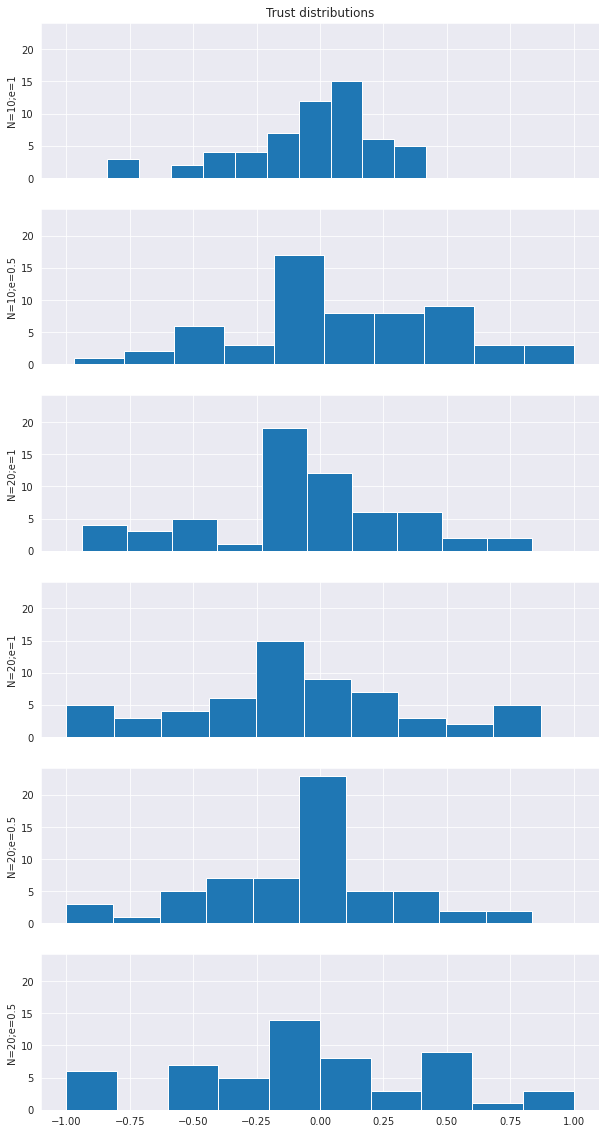

In [24]:
fig,ax =plt.subplots(len(dataframes_saved),1,sharex=True,sharey=True,figsize=(10,20))
dic_bias = {'amarillo':532,'azul':594}
for ij,players_info in enumerate(dataframes_saved):
    distancias_igual = [0 for ij in range(len(players_info))]
    distancias_diff =  [0 for ij in range(len(players_info))]
    for i in range(len(players_info)):
        for mode in ['igual','diferente']:
            if mode == 'igual':
                distancias_igual[i] = abs(dic_bias[players_info[i][0]['Marker']] - players_info[i][0]['Bias'])
            else: 
                if players_info[i][0]['Marker'] == 'amarillo': maskarita = 'azul'
                if players_info[i][0]['Marker'] == 'azul': maskarita = 'amarillo'
                distancias_diff[i] = abs(dic_bias[maskarita] - players_info[i][0]['Bias'])


    nearer = [(distancias_diff[i]-distancias_igual[i])/(distancias_igual[i]+distancias_diff[i]) for i in range(len(distancias_igual))]
    bias_plots = pd.DataFrame({'distance to same marker reference':distancias_igual,
                          'distance to different marker reference':distancias_diff,
                          'trust': nearer
                          })
    print(ij)
    ax[ij].hist(bias_plots['trust'])
    ax[ij].set_ylabel(es[ij])
    if ij == 0:
        ax[ij].set_title("Trust distributions")
    if ij == len(dataframes_saved):
        ax[ij].set_xlabel("Trust")
#plt.savefig(os.path.join(start_point,join_name)+'/trust_'+str(join_name)+'.eps')
#plt.close(fig)


In [25]:
def subplots_probability_norm(dataframes_saved,round_ini=0,round_end=40):
    
    modas = []
    for ij,players_info in enumerate(dataframes_saved):
        for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
            moda_group = []
            players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
            zealots = []
            moda_zealots = []
            for ij2,player in enumerate(players_info_group):
                #Created list of zealots in our subgroup
                if player[0]["Zealot"]:
                    moda_agente = player[1]["acción"].mode()[0] 
                    moda_group.append(moda_agente)
            #print(moda_group,ij)
            modas.append(round(np.average(moda_group)))
            
    import matplotlib
    ijaux=0
    fig,ax =plt.subplots(8,3,sharex=True,sharey=True,figsize=(10,20))
    cmap = matplotlib.colors.ListedColormap(['orange', 'blue'])
    fig.suptitle("Proportion of norm_compliance (y) vs proportion of action following the zealots action (x)")
    k = -1
    for ij,players_info in enumerate(dataframes_saved):
            for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
                players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
                k+=1
                suc = []
                sampenl = []
                av_mark = []
                std_mark = []
                av_mark_2 = []
                std_mark_2 = []
                grupo = []
                grupo_2 = []

                for j in range(len(players_info_group)):
                    lista_prueba = [players_info_group[j][1]["payoff"].iloc[i] for i in range(round_ini,round_end)
                                    if players_info_group[j][1]["acción"].iloc[i]==modas[k]]
                    lista_dic = {"amarillo":0,"azul":1}
                    #lista_prueba = [lista_dic[lista_prueba[i]] for i in range(len(lista_prueba))]
                    #lista_prueba_2 = [lista_dic[lista_prueba_2[i]] for i in range(len(lista_prueba_2))]
                    av_mark.append(len(lista_prueba)/(round_end-round_ini))
                    av_mark_2.append(len(players_info_group[j][2][players_info_group[j][2]["selectionYellow"] == 1.0])/20)
                    grupo.append(players_info[j][0]["Marker"])
                    

                groupaux=0
                if group==4:
                    ijaux +=1
                if group>3:
                    groupaux= -3
                ax[ij+ijaux,group+groupaux-1].scatter(av_mark,av_mark_2,c=list(map(lista_dic.get,grupo)),cmap=cmap)
                ax[ij+ijaux,group+groupaux-1].title.set_text("Group: "+str(group))
                if group == 1 :
                    ax[ij+ijaux,group+groupaux-1].set_ylabel(es[ij])
                #plt.xlabel("Aciertos con azul")
                #plt.ylabel("Aciertos con amarillo")
                #plt.xlim((-0.1,1.1))
                #plt.ylim((-0.1,1.1))
                
                
        #fig.savefig("subplots_success,"+str(round_end)+".jpg")

    return 

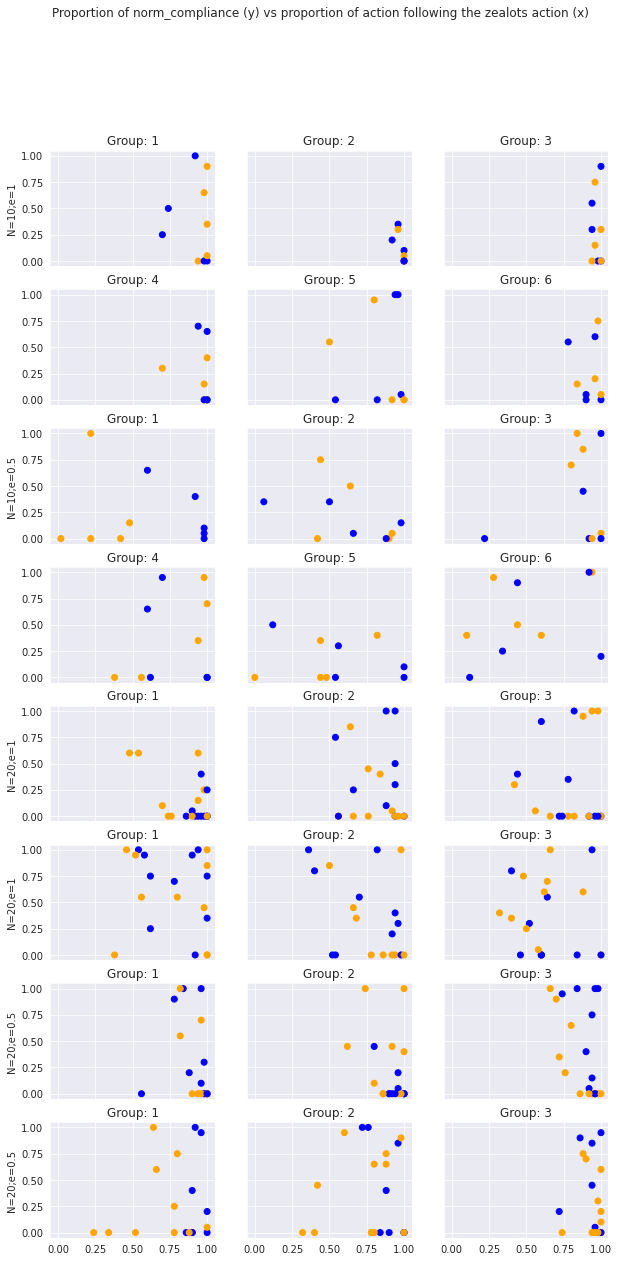

In [26]:
subplots_probability_norm(dataframes_saved,0,50)

In [27]:
coord_rate_total = []
coord_rate_unique = []
for ij,players_info  in enumerate(dataframes_saved):
    round_ini = 0
    round_end = 40
    for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
        players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
        coord_rate = []
        for player in players_info_group:
            a = [player[1]["payoff"].iloc[i] for i in range(round_ini,round_end)].count(1.0)
            coord_rate.append(a)
            coord_rate_unique.append(a)
        coord_rate_total.append(coord_rate)
#del coord_rate_total[3]

In [28]:
import numpy as np
print(np.average([0.7,0.4,0.4,0.4,0.3,0.15,0.6,0.8,0.5,0.5,0.4,0.8]),np.average([0.6,0.6,1.0,0.7,0.4,0.5,0.2,0.4,0.4,0.3,0.25,0.35]))

0.49583333333333335 0.47500000000000003


0
1
2
3


KeyboardInterrupt: 

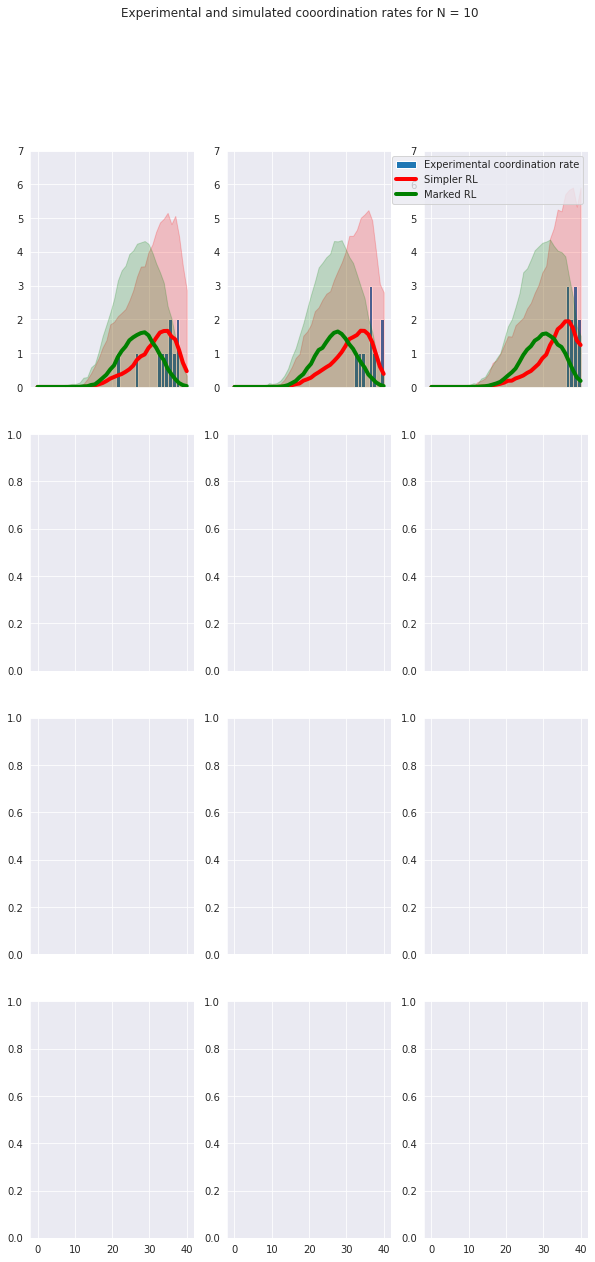

In [29]:
os.chdir(start_point)
%run RL_marker_trax.py
%run RL_simpler_trax.py
round_end = 40
bins = 40
##Insert loop
#learning_rate = [0.7,0.4,0.4,0.4,0.3,0.15,0.6,0.8,0.5,0.5,0.4,0.8]
#for N = 20
learning_rate = [0.6,0.6,1.0,0.7,0.4,0.5,0.2,0.4,0.4,0.3,0.25,0.35]
es = [1,1,1,1,1,1,0.5,0.5,0.5,0.5,0.5,0.5] 
fig,ax =plt.subplots(4,3,sharex=True,figsize=(10,20))
fig.suptitle("Experimental and simulated cooordination rates for N = 10")
for var_aux in range(12):
    print(var_aux)
    ax_0 = var_aux//3
    ax_1 = var_aux%3
    final_results = RL_simpler_trax(learning_rate[var_aux],es[var_aux])
    final_results_mark = RL_marker_trax(learning_rate[var_aux],es[var_aux])
    ax[ax_0,ax_1].set_ylim([0,7])
    #ax.set_xlim([0,10]
    #if ax_1 == 0:
        #ax[ax_0,ax_1].set_ylabel(study_sessions[ax_0])
    
    ax[ax_0,ax_1].hist(coord_rate_total[var_aux],range=(0,40),bins=40,label ="Experimental coordination rate")
    ax[ax_0,ax_1].plot(np.linspace(0,round_end,bins),final_results[0],label = "Simpler RL",linewidth = 4,color="r")
    ax[ax_0,ax_1].fill_between(np.linspace(0,round_end,bins), np.array(final_results[0])-2*np.array(final_results[1]), np.array(final_results[0])+2*np.array(final_results[1]),alpha=0.2,color="r")
    ax[ax_0,ax_1].plot(np.linspace(0,round_end,bins),final_results_mark[0],label = "Marked RL",linewidth = 4,color = "g")
    ax[ax_0,ax_1].fill_between(np.linspace(0,round_end,bins), np.array(final_results_mark[0])-2*np.array(final_results_mark[1]), np.array(final_results_mark[0])+2*np.array(final_results_mark[1]),alpha=0.2,color="g")
    if var_aux == 2:
        ax[ax_0,ax_1].legend(loc = "upper right")


In [ ]:

fig = plt.figure(figsize=(12,8))
plt.ylim(0,4)
av_learning = np.average(learning_rate)
final_results = RL_simpler_trax(av_learning,1)
final_results_mark = RL_marker_trax(av_learning,0.5)
coord_hist = np.histogram(coord_rate_unique,bins=40,range=(0,40))[0]
scaler = sum(final_results[0])/sum(coord_hist)
coord_hist = [coord_hist[i]*scaler for i in range(len(coord_hist))]
plt.bar(np.linspace(0,round_end,bins),coord_hist,width = 1,label = "Experimental coordination rate")
plt.plot(np.linspace(0,round_end,bins),final_results[0],label = "Simpler RL",linewidth = 4,color="r")
plt.fill_between(np.linspace(0,round_end,bins), np.array(final_results[0])-np.array(final_results[1]), np.array(final_results[0])+np.array(final_results[1]),alpha=0.2,color="r")
plt.plot(np.linspace(0,round_end,bins),final_results_mark[0],label = "Marked RL",linewidth = 4,color = "g")
plt.fill_between(np.linspace(0,round_end,bins), np.array(final_results_mark[0])-np.array(final_results_mark[1]), np.array(final_results_mark[0])+np.array(final_results_mark[1]),alpha=0.2,color="g")
plt.title("Coordination rate for N=10, e=0.5 in the marked case")
plt.legend()

In [ ]:

fig = plt.figure(figsize=(12,8))
plt.ylim(0,4)
av_learning = np.average(learning_rate)
final_results = RL_simpler_trax(av_learning,1)
final_results_mark = RL_marker_trax(av_learning,1)
coord_hist = np.histogram(coord_rate_unique,bins=40,range=(0,40))[0]
scaler = sum(final_results[0])/sum(coord_hist)
coord_hist = [coord_hist[i]*scaler for i in range(len(coord_hist))]
plt.bar(np.linspace(0,round_end,bins),coord_hist,width = 1,label = "Experimental coordination rate")
plt.plot(np.linspace(0,round_end,bins),final_results[0],label = "Simpler RL",linewidth = 4,color="r")
plt.fill_between(np.linspace(0,round_end,bins), np.array(final_results[0])-np.array(final_results[1]), np.array(final_results[0])+np.array(final_results[1]),alpha=0.2,color="r")
plt.plot(np.linspace(0,round_end,bins),final_results_mark[0],label = "Marked RL",linewidth = 4,color = "g")
plt.fill_between(np.linspace(0,round_end,bins), np.array(final_results_mark[0])-np.array(final_results_mark[1]), np.array(final_results_mark[0])+np.array(final_results_mark[1]),alpha=0.2,color="g")
plt.title("Coordination rate for N=10, e=1 in the marked case")
plt.legend()

In [ ]:
#limit_zealot = 70
#Zealots=[0.6,0.45,0.4,0.25,0.45,0.4,]
#l = [0.2,0.2,0.15,0.1,0.2,0.1]

dataframes_saved_zealots,dataframes_saved_non_zealots = obtain_zealots_dataframe(dataframes_saved,73)
len(dataframes_saved_zealots[0]),len(dataframes_saved_zealots[1])

In [ ]:
last_change =[]
for j,player in enumerate(players_info_group):
    index_final = players_info_group[j][1]["change_acción"][players_info_group[j][1]["change_acción"] != 0 ]
    if len(index_final)>0:
        last_change.append(players_info_group[j][1]["round_number"][index_final.index[0]])
    else:
        last_change.append(0)

In [ ]:
##Finding zealots 
# In order to find zealots, search for unrewarded behavior that got repeated ro
round_end = 40 
lengths_total = []
sum_lengths = []
for ij,players_info in enumerate(dataframes_saved):
    for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
        lengths_group = []
        players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
        for player in players_info_group:
            a = [player[1]["round_number"].iloc[i+1] for i in range(round_end-1) if player[1]["payoff"].iloc[i] == -0.5]#unrewarded
            b = [player[1]["round_number"].iloc[i+1] for i in range(round_end-1) if player[1]["acción"].iloc[i] == player[1]["acción"].iloc[i+1]]
            c = [value for value in a if value in b]
            lengths_group.append(len(c))
            sum_lengths.append(len(c))
        lengths_total.append(lengths_group)
##The distribution of zealots is a poissonian, we have to find a criteria for zealot related to the 
#l, the learning rate. 

In [ ]:
scaler = len(prob_err_global)/np.average([len(lengths_total[i]) for i in range(len(lengths_total))])
for i in range(len(lengths_total)):
    plt.hist(lengths_total[i],alpha=0.7,range=(0,40),bins=40)
plt.plot([prob_err_global[i]*scaler for i in range(len(prob_err_global))],linewidth = 4)
plt.plot([prob_err_global_mark[i]*scaler for i in range(len(prob_err_global))],linewidth = 4)


In [ ]:
round_ini = 35
round_end = 40
times = [] 
for ij,players_info in enumerate(dataframes_saved):
    for ij2,player in enumerate(players_info):
        player_40 = player[1]["acción"][round_ini:round_end]
        freq_action = player_40.mode()[0]
        times.append(player_40.value_counts()[freq_action])

In [ ]:

plt.figure(figsize=(12,8))
ax = plt.gca()
ax.set_xlim([0.5,1.01])
ax.set_ylim([-0.1,20])
scaler2 = sum(prob_dist_global)/sum(hist_times[0])
hist_times = np.histogram(times,bins=40,range=(0,round_end-round_ini))
hist_scaled = [hist_times[0][i]*scaler2 for i in range(len(hist_times[0]))]
plt.scatter(np.linspace(0,1,40),hist_scaled,linewidth=4)
plt.plot(np.linspace(0,1,40),prob_dist_global,linewidth=4,c="r")
#plt.fill_between(np.linspace(0,round_end,bins), np.array(prob_dist_new)-2*np.array(prob_dist_2_new), np.array(prob_dist_new)+2*np.array(prob_dist_2_new),alpha=0.2,color="r")
#plt.fill_between(np.linspace(0,round_end,bins), np.array(prob_dist_new)-2*np.array(prob_dist_2_new), np.array(prob_dist_new)-2*np.array(prob_dist_2_new),alpha=0.2,color="r")

In [ ]:
freq = []
round_end = 40
for ij,players_info in enumerate(dataframes_saved):
            for group in range(1,int(dataframes_saved[ij][-1][0]['id_in_subsession']+1)):
                players_info_group = [players_info[i] for i in range(len(players_info)) if players_info[i][0]['id_in_subsession'] == group]
                a = [players_info_group[i][1]["acción"].iloc[round_end-1] for i in range(len(players_info_group))]
                freq.append(max(a.count(1),a.count(2))/len(a))
                    

In [ ]:
for var_aux in range(len(coord_rate_total)):

    print(var_aux,ax_0,ax_1)

In [92]:
sum(coord_rate_total[4]),sum(final_results[0])

NameError: name 'coord_rate_total' is not defined

In [93]:
plt.scatter(np.linspace(0,1,40),np.histogram(coord_rate_total[4],bins=40,range=(0,40))[0])

NameError: name 'coord_rate_total' is not defined

In [98]:
df_2.columns

Index(['participant.id_in_session', 'participant.code', 'participant.label',
       'participant._is_bot', 'participant._index_in_pages',
       'participant._max_page_index', 'participant._current_app_name',
       'participant._round_number', 'participant._current_page_name',
       'participant.ip_address', 'participant.time_started',
       'participant.exclude_from_data_analysis', 'participant.visited',
       'participant.mturk_worker_id', 'participant.mturk_assignment_id',
       'player.id_in_group', 'player.paypal', 'player.comments',
       'player.payoff_norm', 'player.payoff_total', 'player.selectionYellow',
       'player.selectionBlue', 'player.payoff', 'group.id_in_subsession',
       'subsession.round_number', 'session.code', 'session.label',
       'session.experimenter_name', 'session.time_scheduled',
       'session.time_started', 'session.mturk_HITId',
       'session.mturk_HITGroupId', 'session.comment', 'session.is_demo'],
      dtype='object')